In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dt = pd.read_csv('Mall_Customers.csv')

In [4]:
def info(data):
    display(data.info())
    display(data.head())
    display(data.describe())

In [5]:
info(dt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Датасет содержит 200 строк и 5 столбцов:

1.   CustomerID - id клиента
2.   Genre - пол клиента
3.   Age - возраст клиента
4.   Annual Income (k$) - Годовой доход клиента (в тысячах долларов)
5.   Spending Score (1-100) - Оценка расходов клиента (от 1 до 100)

Средний возраст клиента 38.8 лет, срредний годовой доход 60.56 тыс. долларов, средняя оценка - 50.2

In [12]:
genres = pd.DataFrame(dt['Genre'].value_counts())

In [15]:
genres['percent'] = (genres['count']/200)*100
genres

,count,percent
Genre,,
Female,112,56.0
Male,88,44.0


Девушек 56%, а мужчин 44%


Наибольшее количество человек находятся в возрасте 32 лет

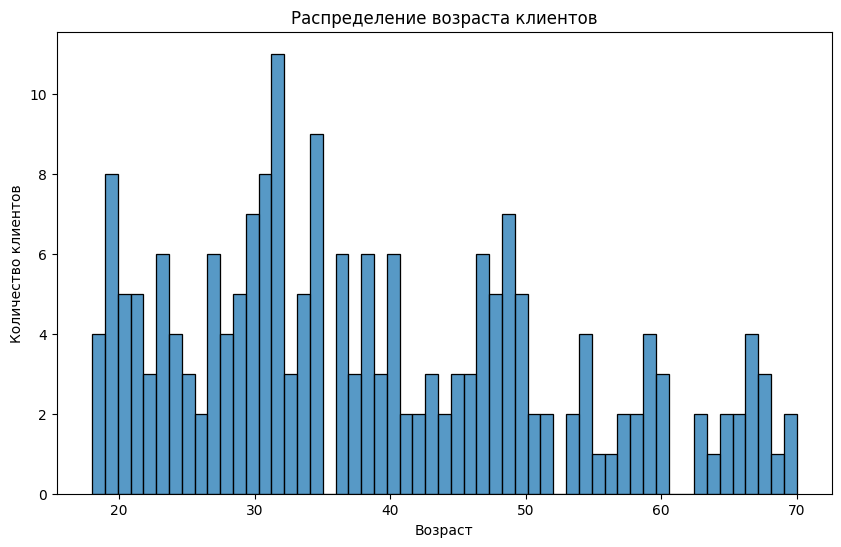

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['Age'], bins=55)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

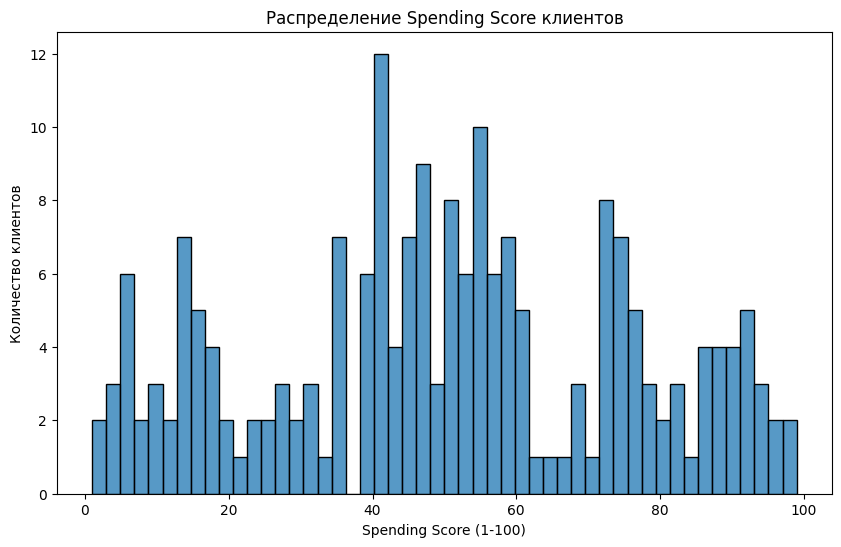

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['Spending Score (1-100)'], bins=50)
plt.title('Распределение Spending Score клиентов')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Количество клиентов')
plt.show()

Зависимость

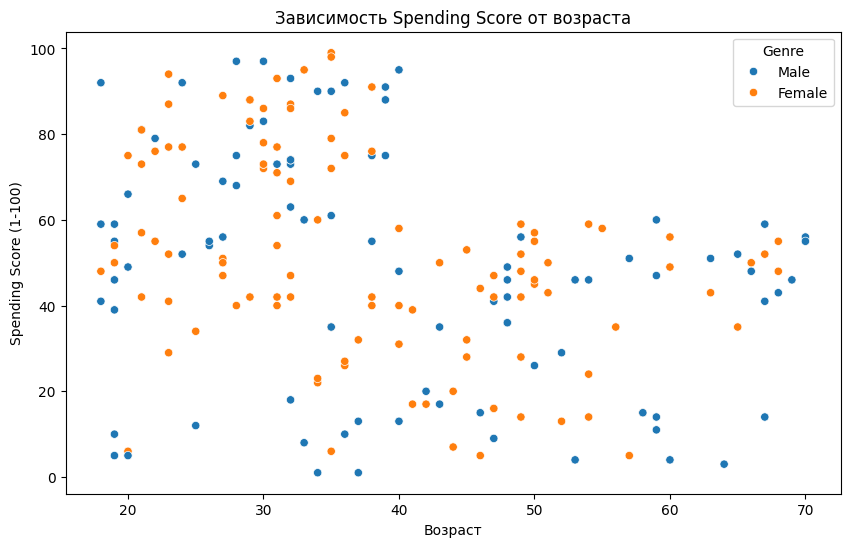

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Genre', data=dt)
plt.title('Зависимость Spending Score от возраста')
plt.xlabel('Возраст')
plt.ylabel('Spending Score (1-100)')
plt.show()

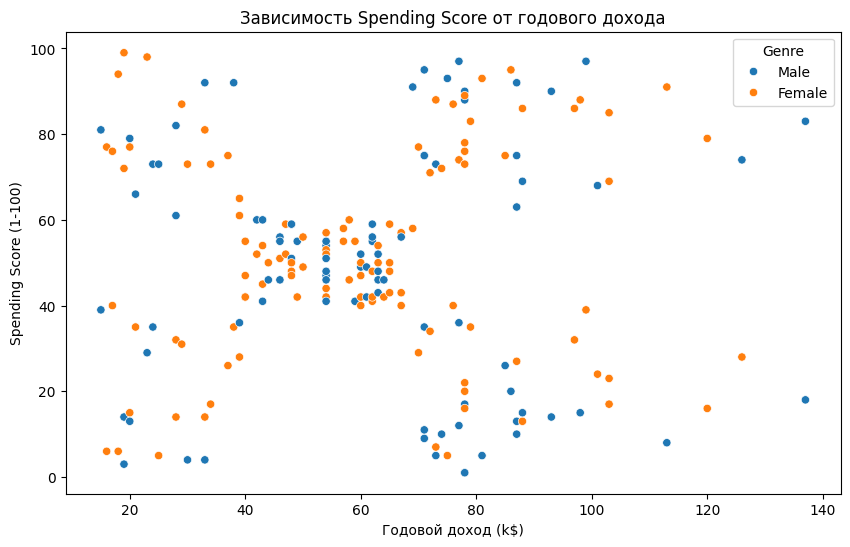

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=dt)
plt.title('Зависимость Spending Score от годового дохода')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
columns = dt.columns.tolist()
print(columns)

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [ ]:
def counts(data, columns):
    for i in columns:
        if i == 'CustomerID':
            continue
        else:
            print(data[i].value_counts())

In [40]:
more_50 = dt[dt['Spending Score (1-100)'] >= 50]
less_50 = dt[dt['Spending Score (1-100)'] < 50]

In [ ]:
more_50

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
195,196,Female,35,120,79
197,198,Male,32,126,74


In [ ]:
less_50

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
8,9,Male,64,19,3
...,...,...,...,...,...
190,191,Female,34,103,23
192,193,Male,33,113,8
194,195,Female,47,120,16
196,197,Female,45,126,28


In [41]:
dt = dt.drop('CustomerID', axis=1)

In [42]:
dt['is_buy'] = np.where(dt['Spending Score (1-100)'] >= 50,1,0)

In [ ]:
dt

,Genre,Age,Annual Income (k$),Spending Score (1-100),is_buy
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,0


In [43]:
onehotencoder = OneHotEncoder(sparse_output = False)
dt_new = pd.DataFrame(onehotencoder.fit_transform(dt[['Genre']]))

In [44]:
onehotencoder.get_feature_names_out()

array(['Genre_Female', 'Genre_Male'], dtype=object)

In [45]:
dt_new.columns = onehotencoder.get_feature_names_out()

In [46]:
dt_new

,Genre_Female,Genre_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [47]:
dt = dt.join(dt_new)
dt.drop('Genre', axis = 1, inplace = True)

In [48]:
dt

,Age,Annual Income (k$),Spending Score (1-100),is_buy,Genre_Female,Genre_Male
0,19,15,39,0,0.0,1.0
1,21,15,81,1,0.0,1.0
2,20,16,6,0,1.0,0.0
3,23,16,77,1,1.0,0.0
4,31,17,40,0,1.0,0.0
...,...,...,...,...,...,...
195,35,120,79,1,1.0,0.0
196,45,126,28,0,1.0,0.0
197,32,126,74,1,0.0,1.0
198,32,137,18,0,0.0,1.0


In [49]:
features = dt.drop(['is_buy'],axis=1)
target = dt['is_buy']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.50%
